In [1]:
# Loading Datset
import pandas as pd
df= pd.read_csv("creditcard.csv")

## Basic Checks

In [2]:
# Checking top 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Checking bottom 5 columns
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
# Checking the No. of rows and Columns from data
df.shape

(284807, 31)

In [5]:
# Checking memory usages
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     284807 non-nu

In [6]:
# Checking data type count
df.dtypes.value_counts()

float64    30
int64       1
Name: count, dtype: int64

In [7]:
# Checking the imbalance of target classes
no_of_classes= df['Class'].nunique()
print(no_of_classes)
df['Class'].value_counts()

2


Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
# The data is really imbalance, So we must have to apply some of the data balancing techniques

## Data Split

In [9]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 30)
(56962, 30)
(227845,)
(56962,)


## Exploratory Data Analysis(EDA)

In [12]:
# Descriptive Statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
# The values are scaled so we can't able to understand the descriptive statistics properly

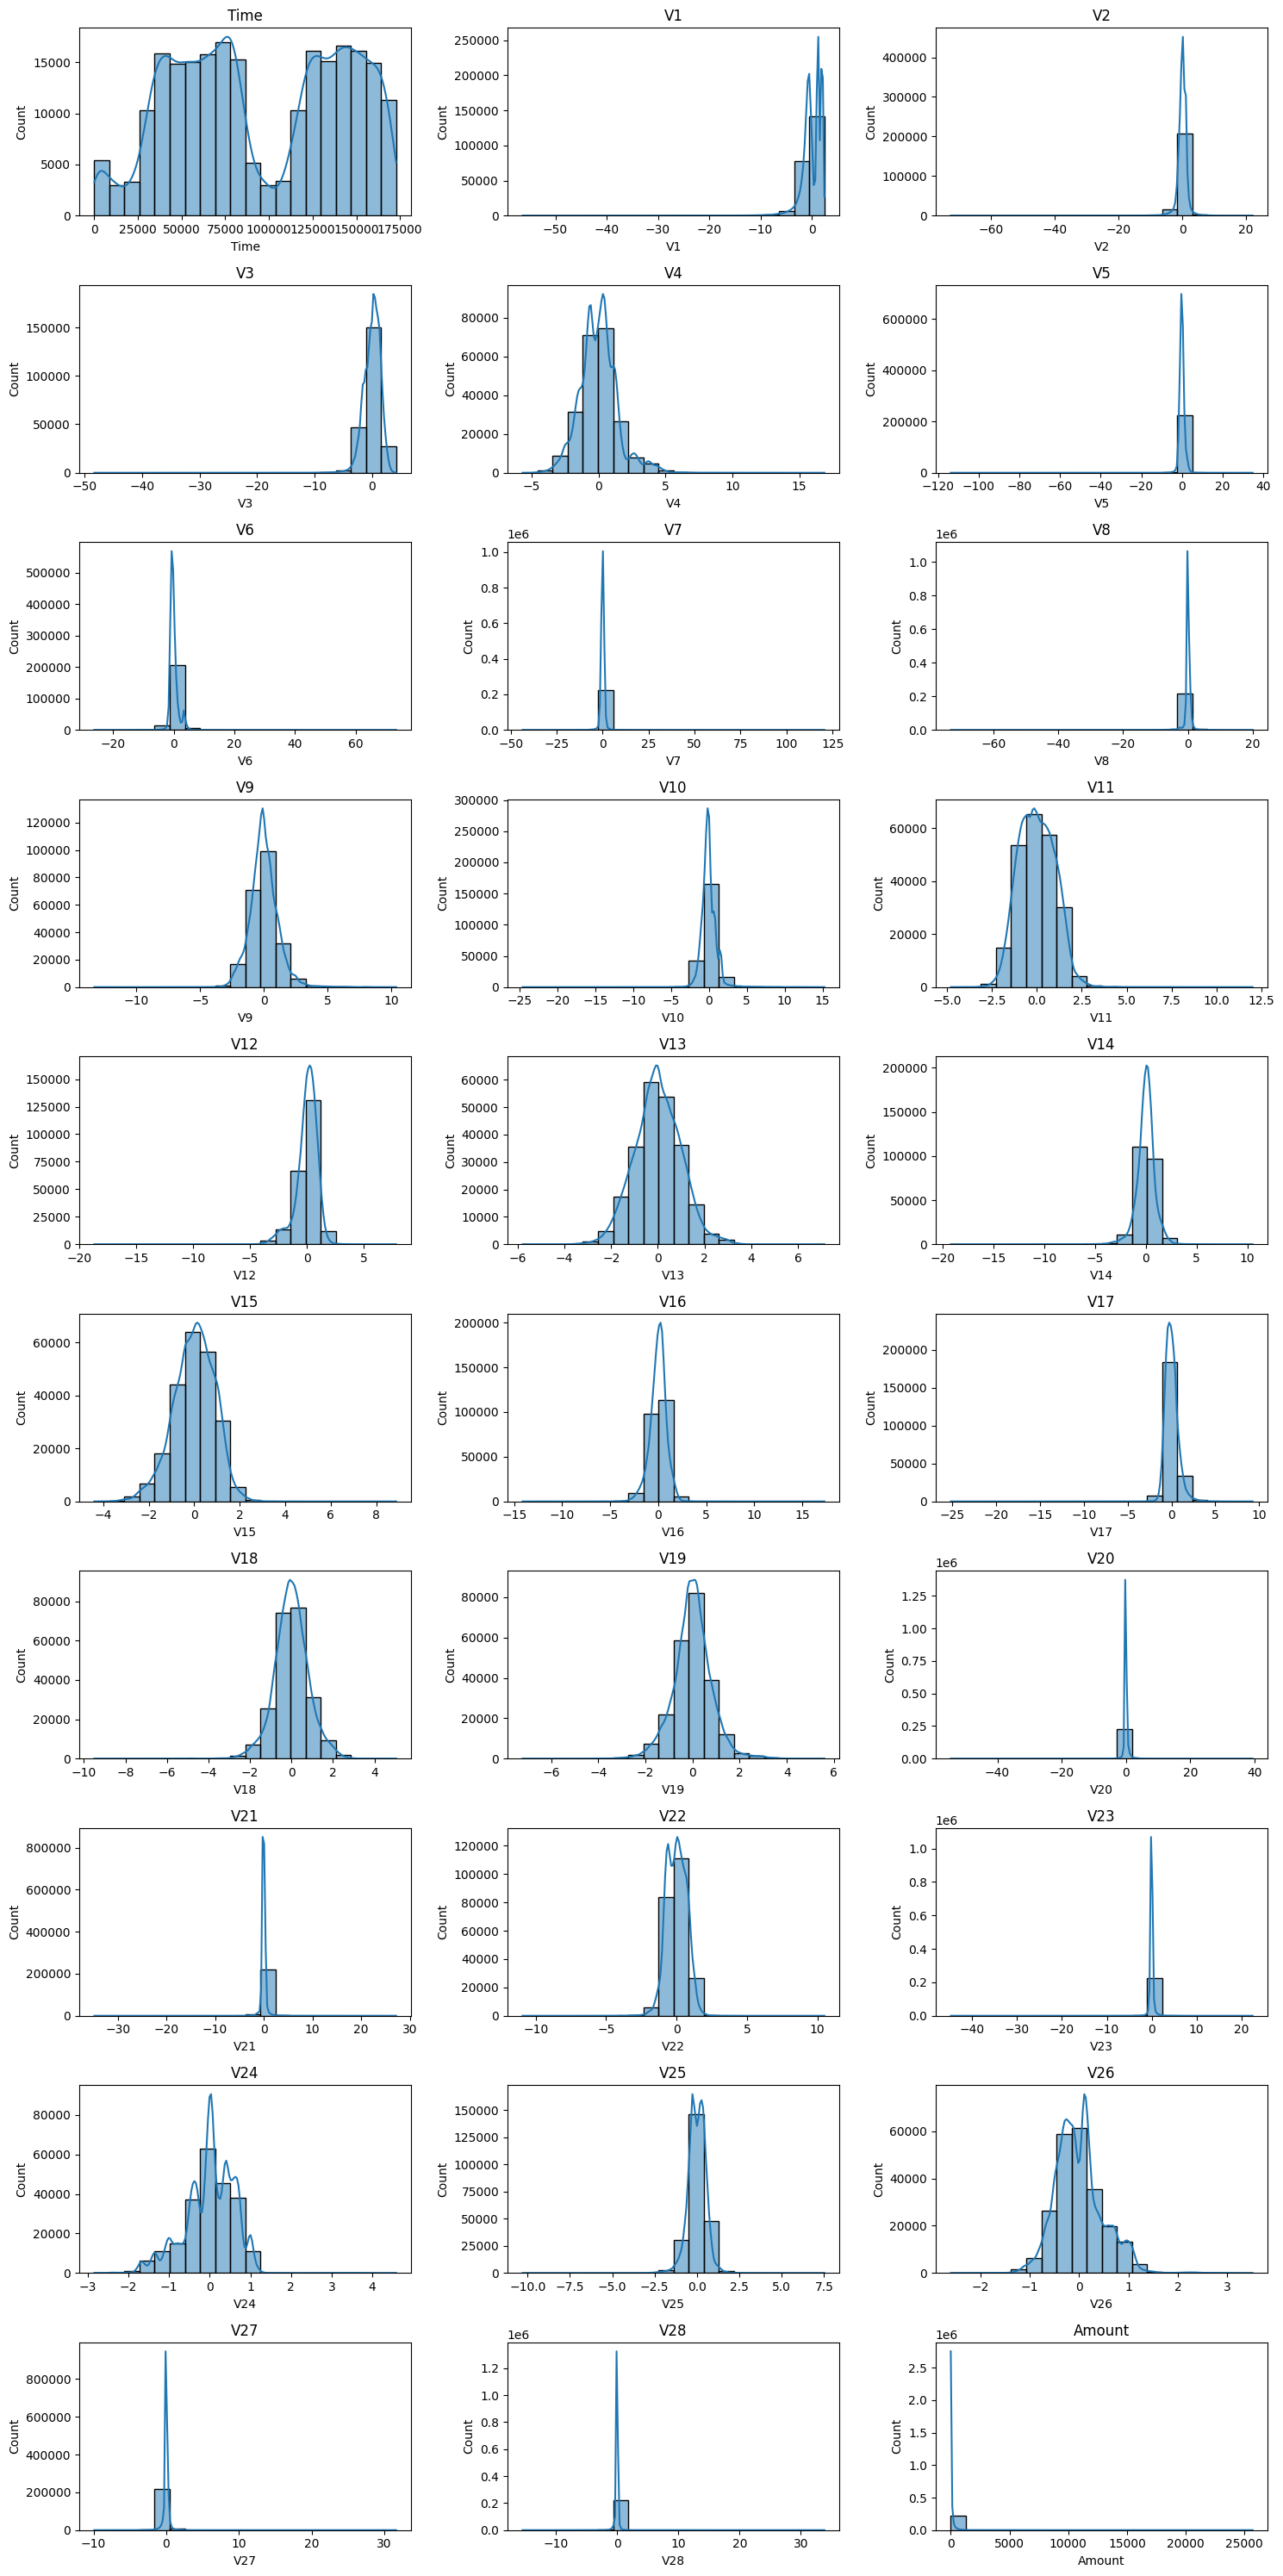

In [14]:
# Univariate Analysis, (Checking the Distribution of data)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Histogram of each feature of X_train
plt.figure(figsize=(15,30))
for i, col in enumerate(X_train.columns):
    plt.subplot(10,3,i+1)
    sns.histplot(X_train[col], kde= True, bins= 20)
    plt.title(col)
plt.tight_layout()
plt.show()

In [15]:
# The Distribution of almost all feature is close to the normal due to the fetures are alredy scaled. Except 'Time' and 'Amount'

In [16]:
corr_with_target= X_train.corrwith(y_train).abs()
top_features= corr_with_target.sort_values(ascending= False)
top_features.head()

V17    0.326790
V14    0.306055
V12    0.263396
V10    0.215498
V16    0.197413
dtype: float64

In [17]:
# V17, V14, V12, V10, V16 are the to feature contributing in prediction of target variable

## Data Cleaning

In [18]:
X_train.isnull().sum().sum()

np.int64(0)

In [19]:
# No null values in th training data 

## Feature Engineering

In [20]:
# Here we have the features in the sclaed form so we did not get an idea to extract or form some fetures using the existing once

In [21]:
# We must scle the 'Time' and 'Amount' features to match the scale of others
from sklearn.preprocessing import StandardScaler

features_to_scale= ['Time', 'Amount']
std= StandardScaler()
X_train[features_to_scale] = std.fit_transform(X_train[features_to_scale])
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.022555,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.307889
165061,0.471283,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.167026
238186,1.153387,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.300043
150562,-0.023638,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.113600
138452,-0.255590,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.246029


In [22]:
# Transforming the test set
X_test[features_to_scale]= std.transform(X_test[features_to_scale])
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-1.122118,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.081514
49906,-1.064083,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.693173
29474,-1.248907,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.225474
276481,1.523119,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.341192
278846,1.551547,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.343585


## Data Balancing using SMOTE

In [23]:
# Data Balancing 
from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state= 42)
X_train_res, y_train_res= sm.fit_resample(X_train, y_train)
print(X_train_res.shape)
print(y_train_res.shape)

(454902, 30)
(454902,)


## Model Building

### Baseline Model

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [25]:
# Starting with the sufficient hidden layers and neurons
model= Sequential()
model.add(Dense(32, activation= 'relu', input_dim= 30))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

d:\DataScienceProjects\CreditCardFraudDetection\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,337 (5.22 KB)

 Trainable params: 1,337 (5.22 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss= 'binary_crossentropy', optimizer= 'Adam', metrics=[tf.keras.metrics.Recall(),'accuracy'])

In [28]:
history= model.fit(X_train_res, y_train_res, epochs=10, validation_split= 0.2)

Epoch 1/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9911 - loss: 0.0286 - recall: 0.9882 - val_accuracy: 0.9992 - val_loss: 0.0083 - val_recall: 0.9992
Epoch 2/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9982 - loss: 0.0075 - recall: 0.9990 - val_accuracy: 0.9985 - val_loss: 0.0092 - val_recall: 0.9985
Epoch 3/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9986 - loss: 0.0058 - recall: 0.9992 - val_accuracy: 0.9978 - val_loss: 0.0110 - val_recall: 0.9978
Epoch 4/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9988 - loss: 0.0051 - recall: 0.9994 - val_accuracy: 0.9999 - val_loss: 0.0022 - val_recall: 0.9999
Epoch 5/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.9990 - loss: 0.0044 - recall: 0.9994 - val_accuracy: 1.0000 - val_loss: 9.6689e-04 - val_recall: 1.0000
Epoch 6/10
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9992 - loss: 0.0038 - recall: 0.9995 - val_accuracy: 0.9995 - val_loss

In [29]:
y_log= model.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [30]:
import numpy as np
y_pred= np.where(y_log>0.5,1,0)

In [31]:
from sklearn.metrics import classification_report, accuracy_score
acc= accuracy_score(y_test, y_pred)
cl_rep= classification_report(y_test, y_pred)
print(acc)
print(cl_rep)

0.9987008883115059
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.58      0.86      0.69        98

    accuracy                           1.00     56962
   macro avg       0.79      0.93      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [32]:
history.history

{'accuracy': [0.9911024570465088,
  0.9981891512870789,
  0.9986453056335449,
  0.9988349080085754,
  0.9989970326423645,
  0.9991921186447144,
  0.9992141127586365,
  0.9992772936820984,
  0.999334990978241,
  0.9993844628334045],
 'loss': [0.028568968176841736,
  0.007527442649006844,
  0.0057878652587533,
  0.005096672102808952,
  0.004447665996849537,
  0.0038238198030740023,
  0.003503070678561926,
  0.0031997747719287872,
  0.0030360533855855465,
  0.002792604034766555],
 'recall': [0.9881659150123596,
  0.9989741444587708,
  0.9992086291313171,
  0.9993771314620972,
  0.9993917942047119,
  0.9995236992835999,
  0.9995310306549072,
  0.9995530247688293,
  0.9995969533920288,
  0.9996042847633362],
 'val_accuracy': [0.999186635017395,
  0.9985491633415222,
  0.997768759727478,
  0.9999340772628784,
  1.0,
  0.9995383620262146,
  0.9999670386314392,
  1.0,
  0.9996592402458191,
  0.9975159764289856],
 'val_loss': [0.008277212269604206,
  0.009156527929008007,
  0.010987574234604836

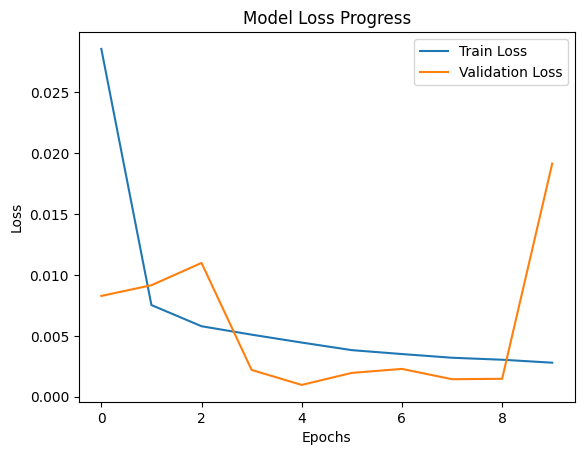

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss Progress')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend() 

plt.show()

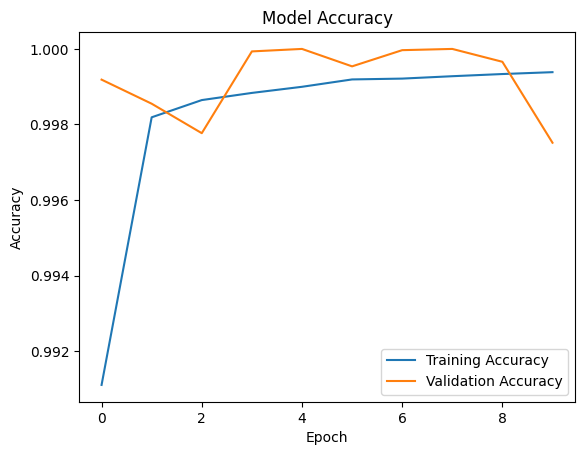

In [34]:

#Plotting Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

#Adding Labels and Title
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

#Adding the Legend
plt.legend(loc='lower right') # Usually accuracy goes up, so bottom right is often empty

plt.show()

In [ ]:
# Our model is trained on just 10 epoch let's train it on more epochs and we will stop it before it overfits, We also add droputs to avoid overfitting of model.
# Model is able to identify 86% of frauds, but the val_loss is increasing and training loss is decreasing which means it is overfitting. Let's  test it for more epochs.

### Early Stopping and Dropouts to avoid Overfitting

In [36]:
# Adding Dropout layers
model_1= Sequential()
model_1.add(Dense(32, activation= 'relu', input_dim= 30))
model_1.add(Dropout(0.2))
model_1.add(Dense(8, activation= 'relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(8, activation= 'relu'))
model_1.add(Dropout(0.6))
model_1.add(Dense(1, activation= 'sigmoid'))

d:\DataScienceProjects\CreditCardFraudDetection\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,337 (5.22 KB)

 Trainable params: 1,337 (5.22 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model_1.compile(loss= 'binary_crossentropy', optimizer= 'Adam', metrics= [tf.keras.metrics.Recall(), 'accuracy'])

In [39]:
call_1 = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [40]:
history_1= model_1.fit(X_train_res, y_train_res, epochs= 100, validation_split= 0.2, callbacks= call_1)

Epoch 1/100
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.9254 - loss: 0.2044 - recall_1: 0.8307 - val_accuracy: 0.9877 - val_loss: 0.0333 - val_recall_1: 0.9877
Epoch 2/100
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.9615 - loss: 0.1230 - recall_1: 0.9062 - val_accuracy: 0.9925 - val_loss: 0.0157 - val_recall_1: 0.9925
Epoch 3/100
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.9674 - loss: 0.1084 - recall_1: 0.9196 - val_accuracy: 0.9957 - val_loss: 0.0094 - val_recall_1: 0.9957
Epoch 4/100
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.9723 - loss: 0.0992 - recall_1: 0.9312 - val_accuracy: 0.9995 - val_loss: 0.0026 - val_recall_1: 0.9995
Epoch 5/100
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.9735 - loss: 0.0957 - recall_1: 0.9339 - val_accuracy: 0.9998 - val_loss: 0.0032 - val_recall_1: 0.9998
Epoch 6/100
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.9742 - loss: 0.0948 - recall_1: 0.9350 - val_acc

In [41]:
y_log_1= model_1.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step


In [54]:
y_pred_1= np.where(y_log_1>0.5,1,0)

In [55]:
from sklearn.metrics import classification_report, accuracy_score
acc_1= accuracy_score(y_test, y_pred_1)
cl_rep_1= classification_report(y_test, y_pred_1)
print(acc_1)
print(cl_rep_1)

0.9990519995786665
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.67      0.87      0.76        98

    accuracy                           1.00     56962
   macro avg       0.84      0.93      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [56]:
# We improved our model to detect the frauds by(1%) but the precision is decreased a lot, So our model now captring 87 frauds out of 100 but 
# 44 times out of 100 it is penalizing the non-fraud customers. So this will aafects later in customer retaintion

In [57]:
history_1.history

{'accuracy': [0.925442636013031,
  0.9614531993865967,
  0.9674270153045654,
  0.9723154306411743,
  0.973518967628479,
  0.9741564989089966,
  0.973961353302002,
  0.9746153950691223,
  0.9743625521659851,
  0.9748407006263733,
  0.9754754304885864,
  0.9753792881965637,
  0.9754699468612671,
  0.9758051633834839,
  0.9755908846855164],
 'loss': [0.20441149175167084,
  0.12301900237798691,
  0.10842332988977432,
  0.09923222661018372,
  0.09574786573648453,
  0.09480084478855133,
  0.09522408246994019,
  0.09321922808885574,
  0.09455069899559021,
  0.09157586097717285,
  0.09109150618314743,
  0.09152397513389587,
  0.09041526913642883,
  0.08956024795770645,
  0.09119196981191635],
 'recall_1': [0.8306660652160645,
  0.9062358140945435,
  0.9196087121963501,
  0.931244969367981,
  0.9338535666465759,
  0.9350113868713379,
  0.9343738555908203,
  0.9359932541847229,
  0.9350699782371521,
  0.9358833432197571,
  0.937641978263855,
  0.9372535943984985,
  0.9373781681060791,
  0.938118

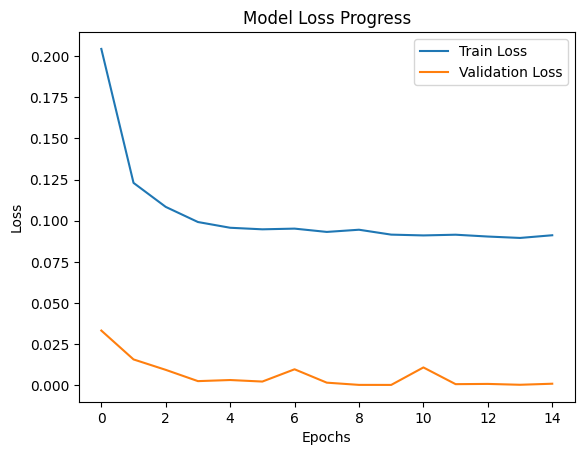

In [58]:
import matplotlib.pyplot as plt

plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')

plt.title('Model Loss Progress')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend() 

plt.show()

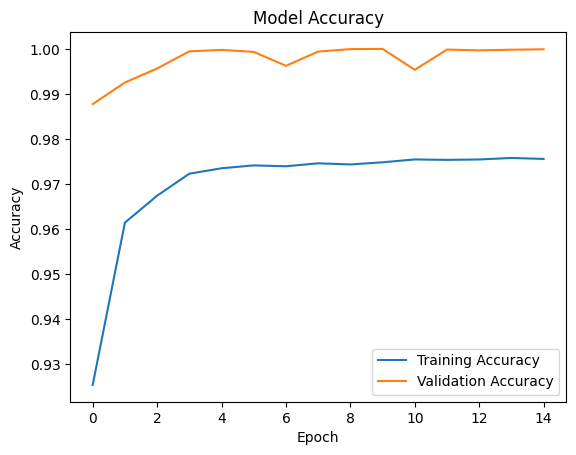

In [59]:

#Plotting Accuracy
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')

#Adding Labels and Title
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

#Adding the Legend
plt.legend(loc='lower right') # Usually accuracy goes up, so bottom right is often empty

plt.show()

In [60]:
# We can say that here the model is overfitting even it ids better on validation than the training, but the validation set is genrated using SMOTE
# So we must try another technique to avoid this

### Defining the class Weights

In [61]:
model_2= Sequential()
model_2.add(Dense(16, activation= 'relu', kernel_regularizer= tf.keras.regularizers.l1(0.001),input_dim= 30))
model_2.add(Dropout(0.2))
model_2.add(Dense(8, activation= 'relu',  kernel_regularizer= tf.keras.regularizers.l1(0.001)))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation= 'sigmoid'))

d:\DataScienceProjects\CreditCardFraudDetection\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model_2.compile(loss= 'binary_crossentropy', optimizer= 'Adam', metrics= [tf.keras.metrics.Recall(), 'accuracy'])

In [63]:
call_2 = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [64]:
# Calculate weights automatically
weights_1 = {0:(227845/(2*227451)),  1:(227845/2*394)} # Very high weight for fraud


In [65]:
history_2= model_2.fit(X_train, y_train, class_weight= weights_1, epochs= 100, validation_split= 0.2, callbacks= call_2)

Epoch 1/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.4939 - loss: 20252.5254 - recall_3: 0.9223 - val_accuracy: 0.3749 - val_loss: 1.5530 - val_recall_3: 1.0000
Epoch 2/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.1963 - loss: 3602.0610 - recall_3: 0.9968 - val_accuracy: 0.1013 - val_loss: 3.1000 - val_recall_3: 1.0000
Epoch 3/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.1003 - loss: 943.8440 - recall_3: 1.0000 - val_accuracy: 0.0445 - val_loss: 4.8663 - val_recall_3: 1.0000
Epoch 4/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.0609 - loss: 820.3449 - recall_3: 1.0000 - val_accuracy: 0.0140 - val_loss: 6.3650 - val_recall_3: 1.0000
Epoch 5/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.0437 - loss: 473.9170 - recall_3: 1.0000 - val_accuracy: 0.0227 - val_loss: 6.0193 - val_recall_3: 1.0000
Epoch 6/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.1536 - loss: 2089.4851 - recall_3: 0.9935 - val

In [66]:
y_log_2= model_2.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step


In [67]:
#Calculate Precision, Recall, and Thresholds
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_log_2)

f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)

#Find the index of the highest F1-Score
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]

print(f"The mathematically optimal threshold is: {best_threshold:.4f}")
print(f"Expected Precision: {precisions[best_index]:.4f}")
print(f"Expected Recall: {recalls[best_index]:.4f}")
print(f"Expected F1-Score: {f1_scores[best_index]:.4f}")

The mathematically optimal threshold is: 1.0000
Expected Precision: 0.0305
Expected Recall: 0.8878
Expected F1-Score: 0.0590


In [68]:
y_pred_2= np.where(y_log_2>0.9,1,0)

In [69]:
from sklearn.metrics import classification_report, accuracy_score
acc_2= accuracy_score(y_test, y_pred_2)
cl_rep_2= classification_report(y_test, y_pred_2)
print(acc_2)
print(cl_rep_2)

0.0017204452090867595
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     56864
           1       0.00      1.00      0.00        98

    accuracy                           0.00     56962
   macro avg       0.00      0.50      0.00     56962
weighted avg       0.00      0.00      0.00     56962



d:\DataScienceProjects\CreditCardFraudDetection\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\DataScienceProjects\CreditCardFraudDetection\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\DataScienceProjects\CreditCardFraudDetection\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [70]:
# Our model is most accurate to identify the Fraud but it is very harsh to the customers who are not involved in fraud, So we should maintain balance

### Defining Custom Weights for the classes (Fine Tunning)

In [71]:
model_3= Sequential()
model_3.add(Dense(16, activation= 'relu', kernel_regularizer= tf.keras.regularizers.l1(0.001),input_dim= 30))
model_3.add(Dropout(0.2))
model_3.add(Dense(8, activation= 'relu',  kernel_regularizer= tf.keras.regularizers.l1(0.001)))
model_3.add(Dropout(0.5))
model_3.add(Dense(1, activation= 'sigmoid'))

d:\DataScienceProjects\CreditCardFraudDetection\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
model_3.compile(loss= 'binary_crossentropy', optimizer= 'Adam', metrics= [tf.keras.metrics.Recall(), 'accuracy'])

In [73]:
call_3 = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [74]:
model_3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
#Defining custom weights
weights_2 = {0:1.0,  1:50} 

In [76]:
history_3= model_3.fit(X_train, y_train, class_weight= weights_2, epochs= 100, validation_split= 0.2, callbacks= call_3)

Epoch 1/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9870 - loss: 0.3168 - recall_4: 0.5761 - val_accuracy: 0.9992 - val_loss: 0.0958 - val_recall_4: 0.8471
Epoch 2/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9969 - loss: 0.1732 - recall_4: 0.6764 - val_accuracy: 0.9990 - val_loss: 0.0687 - val_recall_4: 0.8471
Epoch 3/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9979 - loss: 0.1409 - recall_4: 0.7379 - val_accuracy: 0.9993 - val_loss: 0.0456 - val_recall_4: 0.8471
Epoch 4/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9982 - loss: 0.1313 - recall_4: 0.7120 - val_accuracy: 0.9990 - val_loss: 0.0395 - val_recall_4: 0.8588
Epoch 5/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9982 - loss: 0.1184 - recall_4: 0.6958 - val_accuracy: 0.9987 - val_loss: 0.0390 - val_recall_4: 0.8824
Epoch 6/100
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9981 - loss: 0.1188 - recall_4: 0.7120 - val_accuracy: 0.998

In [77]:
history_3.history

{'accuracy': [0.9870086908340454,
  0.9968893527984619,
  0.9978877902030945,
  0.998249888420105,
  0.9981676340103149,
  0.9981237053871155,
  0.998013973236084,
  0.9984035491943359,
  0.998249888420105,
  0.9983322024345398,
  0.9982938170433044,
  0.9978768229484558,
  0.9982608556747437,
  0.998485803604126,
  0.9979207515716553,
  0.9984638690948486,
  0.9982938170433044,
  0.9980579018592834,
  0.9980030059814453,
  0.9982389211654663,
  0.9979920387268066,
  0.9979207515716553,
  0.9984035491943359],
 'loss': [0.31680169701576233,
  0.17317761480808258,
  0.14094683527946472,
  0.1312742531299591,
  0.11839175224304199,
  0.1188003197312355,
  0.11206946521997452,
  0.12280075997114182,
  0.10914205014705658,
  0.11328356713056564,
  0.11146220564842224,
  0.1151115670800209,
  0.11530639231204987,
  0.11220952868461609,
  0.11387231945991516,
  0.11312371492385864,
  0.10673177242279053,
  0.11260489374399185,
  0.10826347768306732,
  0.11010398715734482,
  0.1096951812505722

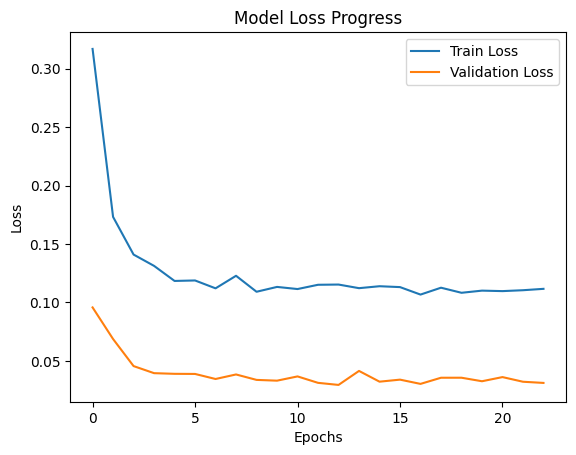

In [78]:
import matplotlib.pyplot as plt

plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')

plt.title('Model Loss Progress')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend() 

plt.show()

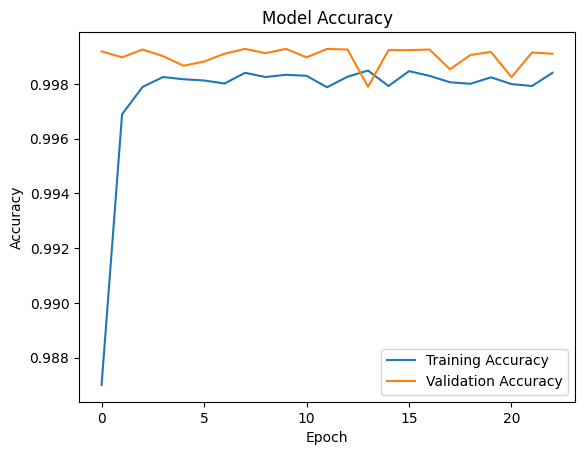

In [79]:

#Plotting Accuracy
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')

#Adding Labels and Title
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

#Adding the Legend
plt.legend(loc='lower right') # Usually accuracy goes up, so bottom right is often empty

plt.show()

In [80]:
y_log_3= model_3.predict(X_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [82]:
y_pred_3= np.where(y_log_3> 0.5,1,0)

In [83]:
from sklearn.metrics import classification_report, accuracy_score
acc_3= accuracy_score(y_test, y_pred_3)
cl_rep_3= classification_report(y_test, y_pred_3)
print(acc_3)
print(cl_rep_3)

0.9992275552122467
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.87      0.79        98

    accuracy                           1.00     56962
   macro avg       0.87      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [84]:
#Now this is the best model. Because it is capturing 87% fruads and it is not as harsh as the previous one for the non-frauders.

### Hyperparameter Tunning using Keras Tuner


# --- 1. Define the Hypermodel ---
def build_model(hp):
    model_5 = keras.Sequential()
    
    # Hidden layer 1
    model_5.add(keras.layers.Dense(
        units=hp.Choice('units_1', [8, 16, 32, 64]),
        activation='relu'
    ))
    model_5.add(keras.layers.Dropout(
        rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)
    ))
    
    # Hidden layer 2
    model_5.add(keras.layers.Dense(
        units=hp.Choice('units_2', [8, 16, 32, 64]),
        activation='relu'
    ))
    model_5.add(keras.layers.Dropout(
        rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)
    ))
    
    # Hidden layer 3
    model_5.add(keras.layers.Dense(
        units=hp.Choice('units_3', [8, 16, 32, 64]),
        activation='relu'
    ))
    model_5.add(keras.layers.Dropout(
        rate=hp.Float('dropout_3', min_value=0.0, max_value=0.5, step=0.1)
    ))
    
    # Output layer
    model_5.add(keras.layers.Dense(1, activation='sigmoid'))
    
    # Optimizer tuning
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop'])
    
    model_5.compile(
        optimizer=optimizer_choice,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model_5



# --- 2. Initialize and Run the Tuner ---
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    directory='tuning_dir',
    project_name='my_keras_tuning',
    overwrite=True
)

print("Starting Hyperparameter Search...")
# Uses your existing X_train and y_train
tuner.search(X_train, y_train, epochs=5, validation_split=0.2)

# Print tuning summary
tuner.results_summary()

# --- 3. Extract Best Hyperparameters ---
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\n--- Optimal Settings Found ---")
print(f"Layer 1 Units: {best_hps.get('units_1')} | Dropout: {best_hps.get('dropout_1')}")
print(f"Layer 2 Units: {best_hps.get('units_2')} | Dropout: {best_hps.get('dropout_2')}")
print(f"Layer 3 Units: {best_hps.get('units_3')} | Dropout: {best_hps.get('dropout_3')}")
print(f"Optimizer: {best_hps.get('optimizer')}")
print("------------------------------\n")



# --- 4. Build and Retrain Final Model ---
# Build a fresh model with the best parameters
final_model_5 = tuner.hypermodel.build(best_hps)

# Setup Early Stopping to prevent overfitting during the longer training run
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True 
)

print("Starting Final Model Training...")
history = final_model_5.fit(
    X_train, 
    y_train, 
    epochs=50, 
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Show the final model architecture
# Build the model using the input shape to successfully print the summary
final_model_5.summary()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Generate prediction probabilities on your test set
y_pred_prob = final_model_5.predict(X_test)

# 2. Convert probabilities to binary class labels (0 or 1) using a 0.5 threshold
y_pred = (y_pred_prob > 0.08).astype(int)

# 3. Print the Classification Report
print("\n--- Classification Report ---")
# This will show Precision, Recall, and F1-Score for both Normal (0) and Fraud (1)
print(classification_report(y_test, y_pred, target_names=['Normal (0)', 'Fraud (1)']))

# 4. Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 5. Plot the Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Normal', 'Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('Fraud Detection Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [140]:
#We tried hyperparameter tunning but the model is not getting better

In [141]:
#So our best model is model_3

### Saving the best model

In [142]:
# This saves the architecture, weights, and optimizer state to a single file
model_3.save('best_fraud_model.keras')

print("Model successfully saved!")

Model successfully saved!


In [143]:
#from tensorflow.keras.models import load_model

# Load the saved model from the file
#loaded_model = load_model('best_fraud_model.keras')

#print("Model successfully loaded!")

# You can now use it exactly like model_3
# predictions = loaded_model.predict(X_test)